# Brownian Motion

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Part 1. Simulate a single 1d random walk until absorption.


 The starting point is -50
 The Absoprtion point is 50 
 Number of step taken: 1700
 The minimum value is -50 
 The maximum value is 50


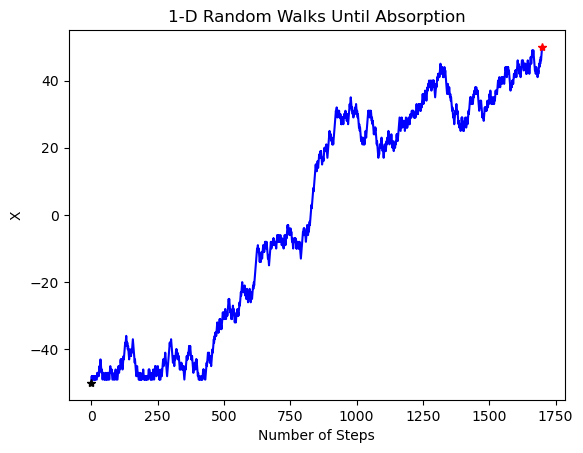

In [2]:


x = -50       #Initialize starting point to -50.
x_position = [x]
step = np.array([-1,1])

while x!=50: # Set a while loop so that it breaks once 50 i.e. the point of absorption is reached.
  probability = np.random.choice(step, p = [.5,.5])
  x += probability
  if x in range(-50,51):
      #Random number generator ranging from -1 to 1.
    if x == 50:       #If x == 50, the simulation ends
      x_position.append(x)
      break
    elif x == -50: #If x is stuck at the starting point, then it moves one step forward.
      probability = np.random.choice(step, p = [0,1])
      x += probability
      x_position.append(x)
    else:
      x_position.append(x) #If x is anywhere between -50 and 50, then you add it to the list.
np.array(x_position)       #Convert list to array once the while loop breaks.
print(f'\n The starting point is {x_position[0]}\n The Absoprtion point is {x_position[-1]} \n Number of step taken: {len(x_position)}\n The minimum value is {min(x_position)} \n The maximum value is {max(x_position)}') #Verify if 50 is the absorption point and log how many steps were taken.
steps = range(0,len(x_position)) #Creates an axis for number of steps in the plot below.
start = x_position[:1]
stop = x_position[-1:]
plt.plot(steps,x_position, 'b')
plt.title("1-D Random Walks Until Absorption")
plt.xlabel('Number of Steps')
plt.ylabel('X')
plt.plot(steps[:1], start, 'k*') #Starting point
plt.plot(steps[-1:], stop, 'r*') #Absorption point
plt.show()

## Part 2. Simulate a single 2d random walk until absorption.


 The Absoprtion point is (X,Y) = (50, 0) 
 Number of steps taken: (X,Y) = (54055, 54055)

 Min X: -50 
 Min Y: -50 
 Max X: 50 
 Max Y: 50


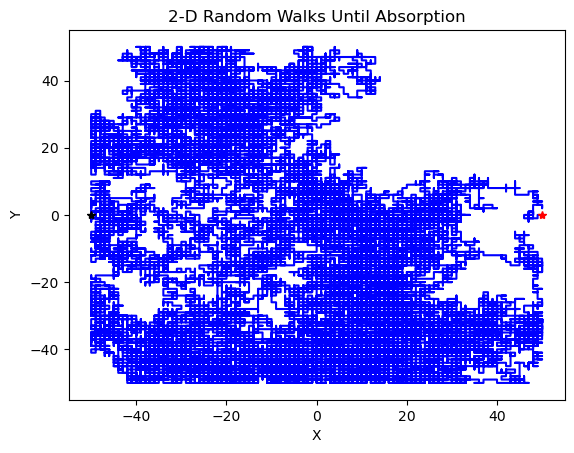

In [3]:
x=-50
y=0
x_position = [x]
y_position = [y]
rng = np.random.default_rng()
while x!=50 or y!=0:
  direction = rng.integers(4, size=1)
  if x==-50 and y==-50:
    if direction==0:
      x+=1
    elif direction==1:
      y+=1
    elif direction==2:
      x+=1
    elif direction==3:
      y+=1
    x_position.append(x)
    y_position.append(y)
  elif x==-50 and y==50:
    if direction==0:
      x+=1
    elif direction==1:
      y-=1
    elif direction==2:
      x+=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif x==50 and y==-50:
    if direction==0:
      x-=1
    elif direction==1:
      y+=1
    elif direction==2:
      x-=1
    elif direction==3:
      y+=1
    x_position.append(x)
    y_position.append(y)
  elif x==50 and y==50:
    if direction==0:
      x-=1
    elif direction==1:
      y-=1
    elif direction==2:
      x-=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif x==50:
    if direction==0:
      x-=1
    elif direction==1:
      y+=1
    elif direction==2:
      x-=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif x==-50:
    if direction==0:
      x+=1
    elif direction==1:
      y+=1
    elif direction==2:
      x+=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif y==50:
    if direction==0:
      x+=1
    elif direction==1:
      y-=1
    elif direction==2:
      x-=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif y==-50:
    if direction==0:
      x+=1
    elif direction==1:
      y+=1
    elif direction==2:
      x-=1
    elif direction==3:
      y+=1
    x_position.append(x)
    y_position.append(y)
  else:
    if direction==0:
      x+=1
    elif direction==1:
      y+=1
    elif direction==2:
      x-=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)



np.array(x_position)
np.array(y_position)
print(f'\n The Absoprtion point is (X,Y) = ({x_position[-1]}, {y_position[-1]}) \n Number of steps taken: (X,Y) = ({len(x_position)}, {len(y_position)})')
print(f'\n Min X: {min(x_position)} \n Min Y: {min(y_position)} \n Max X: {max(x_position)} \n Max Y: {max(y_position)}')
plt.plot(x_position,y_position, 'b')
plt.title("2-D Random Walks Until Absorption")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_position[:1], y_position[:1], 'k*')
plt.plot(x_position[-1], y_position[-1], 'r*')
plt.show()

## Part 3. Simulate many random walks and get some statistics.

In [4]:
def statistics(N):
  stats = []
  for i in range(1,N+1):
    x=-50
    y=0
    x_position = [x]
    y_position = [y]
    rng = np.random.default_rng()
    while x!=50 or y!=0:
      direction = rng.integers(4, size=1)
      if x==-50 and y==-50:
        if direction==0:
          x+=1
        elif direction==1:
          y+=1
        elif direction==2:
          x+=1
        elif direction==3:
          y+=1
        x_position.append(x)
        y_position.append(y)
      elif x==-50 and y==50:
        if direction==0:
          x+=1
        elif direction==1:
          y-=1
        elif direction==2:
          x+=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif x==50 and y==-50:
        if direction==0:
          x-=1
        elif direction==1:
          y+=1
        elif direction==2:
          x-=1
        elif direction==3:
          y+=1
        x_position.append(x)
        y_position.append(y)
      elif x==50 and y==50:
        if direction==0:
          x-=1
        elif direction==1:
          y-=1
        elif direction==2:
          x-=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif x==50:
        if direction==0:
          x-=1
        elif direction==1:
          y+=1
        elif direction==2:
          x-=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif x==-50:
        if direction==0:
          x+=1
        elif direction==1:
          y+=1
        elif direction==2:
          x+=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif y==50:
        if direction==0:
          x+=1
        elif direction==1:
          y-=1
        elif direction==2:
          x-=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif y==-50:
        if direction==0:
          x+=1
        elif direction==1:
          y+=1
        elif direction==2:
          x-=1
        elif direction==3:
          y+=1
        x_position.append(x)
        y_position.append(y)
      else:
        if direction==0:
          x+=1
        elif direction==1:
          y+=1
        elif direction==2:
          x-=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)

    np.array(x_position)
    np.array(y_position)
    steps = len(x_position)
    np.array(stats.append(steps))
  return stats


 Mean: 67432.32
 Standard Deviation: 57570.3812321718


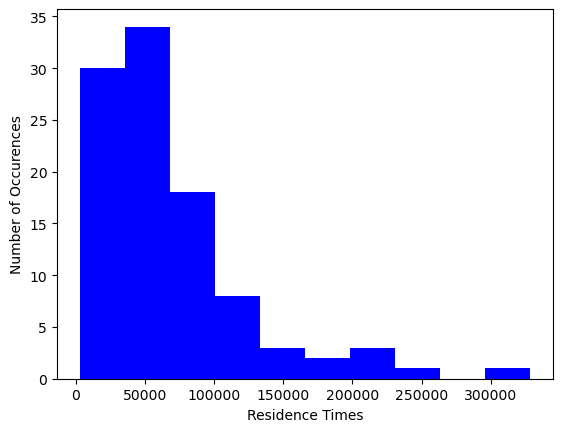

In [5]:
a = statistics(100)
print(f'\n Mean: {np.mean(a)}\n Standard Deviation: {np.std(a)}')

plt.hist(a, color = 'blue')
plt.xlabel('Residence Times')
plt.ylabel('Number of Occurences')
plt.show()


 Mean: 73308.784
 Standard Deviation: 65758.33205501296


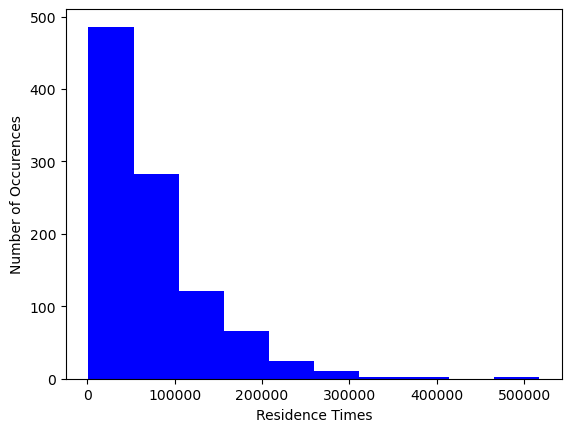

In [6]:
b = statistics(1000) #This guy took 27 minutes! Be patient please.
print(f'\n Mean: {np.mean(b)}\n Standard Deviation: {np.std(b)}')

plt.hist(b, color = 'blue')
plt.xlabel('Residence Times')
plt.ylabel('Number of Occurences')
plt.show()

# Range y=-25 to y=25


 The Absoprtion point is (X,Y) = (50, -24) 
 Number of steps taken: (X,Y) = (91347, 91347)

 Min X: -50 
 Min Y: -50 
 Max X: 50 
 Max Y: 50


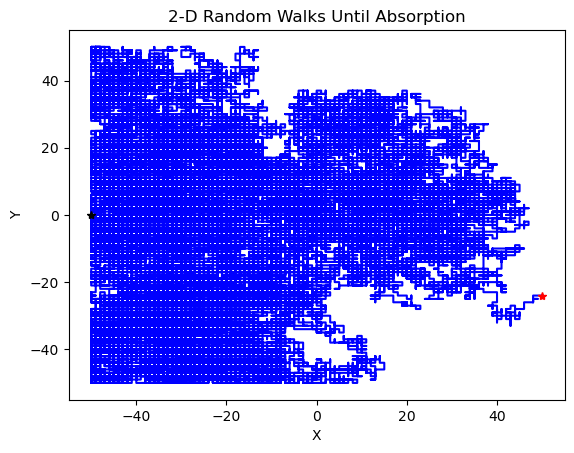

In [7]:
x=-50
y=0
x_position = [x]
y_position = [y]
rng = np.random.default_rng()
while x!=50 or y not in range(-25,26):
  direction = rng.integers(4, size=1)
  if x==-50 and y==-50:
    if direction==0:
      x+=1
    elif direction==1:
      y+=1
    elif direction==2:
      x+=1
    elif direction==3:
      y+=1
    x_position.append(x)
    y_position.append(y)
  elif x==-50 and y==50:
    if direction==0:
      x+=1
    elif direction==1:
      y-=1
    elif direction==2:
      x+=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif x==50 and y==-50:
    if direction==0:
      x-=1
    elif direction==1:
      y+=1
    elif direction==2:
      x-=1
    elif direction==3:
      y+=1
    x_position.append(x)
    y_position.append(y)
  elif x==50 and y==50:
    if direction==0:
      x-=1
    elif direction==1:
      y-=1
    elif direction==2:
      x-=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif x==50:
    if direction==0:
      x-=1
    elif direction==1:
      y+=1
    elif direction==2:
      x-=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif x==-50:
    if direction==0:
      x+=1
    if direction==1:
      y+=1
    if direction==2:
      x+=1
    if direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif y==50:
    if direction==0:
      x+=1
    elif direction==1:
      y-=1
    elif direction==2:
      x-=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)
  elif y==-50:
    if direction==0:
      x+=1
    elif direction==1:
      y+=1
    elif direction==2:
      x-=1
    elif direction==3:
      y+=1
    x_position.append(x)
    y_position.append(y)
  else:
    if direction==0:
      x+=1
    elif direction==1:
      y+=1
    elif direction==2:
      x-=1
    elif direction==3:
      y-=1
    x_position.append(x)
    y_position.append(y)



np.array(x_position)
np.array(y_position)
print(f'\n The Absoprtion point is (X,Y) = ({x_position[-1]}, {y_position[-1]}) \n Number of steps taken: (X,Y) = ({len(x_position)}, {len(y_position)})')
print(f'\n Min X: {min(x_position)} \n Min Y: {min(y_position)} \n Max X: {max(x_position)} \n Max Y: {max(y_position)}')
plt.plot(x_position,y_position, 'b')
plt.title("2-D Random Walks Until Absorption")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_position[:1], y_position[:1], 'k*')
plt.plot(x_position[-1], y_position[-1], 'r*')
plt.show()

In [8]:
def statistics_25(N):
  stats = []
  for i in range(1,N+1):
    x=-50
    y=0
    x_position = [x]
    y_position = [y]
    rng = np.random.default_rng()
    while x!=50 or y not in range(-25,26):
      direction = rng.integers(4, size=1)
      if x==-50 and y==-50:
        if direction==0:
          x+=1
        elif direction==1:
          y+=1
        elif direction==2:
          x+=1
        elif direction==3:
          y+=1
        x_position.append(x)
        y_position.append(y)
      elif x==-50 and y==50:
        if direction==0:
          x+=1
        elif direction==1:
          y-=1
        elif direction==2:
          x+=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif x==50 and y==-50:
        if direction==0:
          x-=1
        elif direction==1:
          y+=1
        elif direction==2:
          x-=1
        elif direction==3:
          y+=1
        x_position.append(x)
        y_position.append(y)
      elif x==50 and y==50:
        if direction==0:
          x-=1
        if direction==1:
          y-=1
        if direction==2:
          x-=1
        if direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif x==50:
        if direction==0:
          x-=1
        if direction==1:
          y+=1
        if direction==2:
          x-=1
        if direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif x==-50:
        if direction==0:
          x+=1
        elif direction==1:
          y+=1
        elif direction==2:
          x+=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif y==50:
        if direction==0:
          x+=1
        elif direction==1:
          y-=1
        elif direction==2:
          x-=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)
      elif y==-50:
        if direction==0:
          x+=1
        elif direction==1:
          y+=1
        elif direction==2:
          x-=1
        elif direction==3:
          y+=1
        x_position.append(x)
        y_position.append(y)
      else:
        if direction==0:
          x+=1
        elif direction==1:
          y+=1
        elif direction==2:
          x-=1
        elif direction==3:
          y-=1
        x_position.append(x)
        y_position.append(y)

    np.array(x_position)
    np.array(y_position)
    steps = len(x_position)
    np.array(stats.append(steps))
  return stats


 Mean: 23975.18
 Standard Deviation: 17390.124344224798


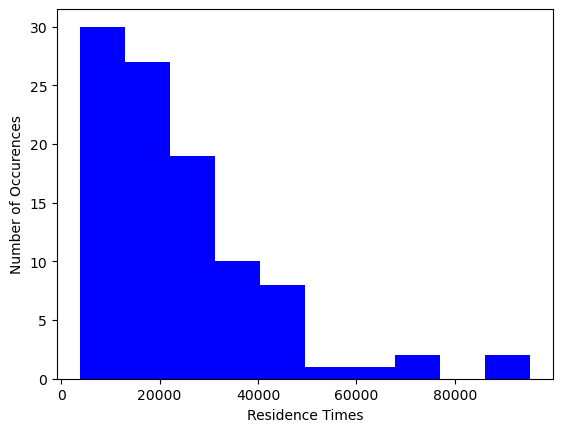

In [9]:
c=statistics_25(100)
print(f'\n Mean: {np.mean(c)}\n Standard Deviation: {np.std(c)}')

plt.hist(c, color = 'blue')
plt.xlabel('Residence Times')
plt.ylabel('Number of Occurences')
plt.show()


 Mean: 23796.398
 Standard Deviation: 18679.36209477176


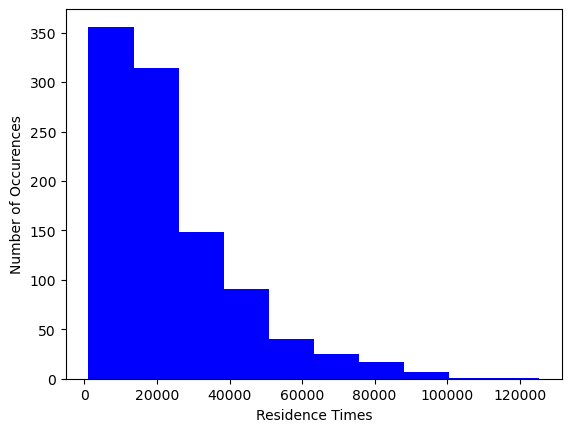

In [10]:
d=statistics_25(1000)
print(f'\n Mean: {np.mean(d)}\n Standard Deviation: {np.std(d)}')

plt.hist(d, color = 'blue')
plt.xlabel('Residence Times')
plt.ylabel('Number of Occurences')
plt.show()

The mean and standard deviation are much lower in J than in H. The histogram in J shows that more trials reach the point of absorption in fewer steps than the histogram in H. The histogram in J shows that most residence times are completed in under 20,000 steps, while most residence times in H are completed between 50,000 and 100,000 steps.